# Deep learning

In this lesson we will introduce the use of supervised machine learning on biological data.
We will discuss nearest neighour classifier, support vector machine, neural networks and deep learning (specifically convolutional neural networks).

Our toy example will be to classify species as endangered or not based genomic data. The rationale is that species with a small (effective population size) will have higher chances to be threatened. The amount of genomic variability (e.g. polymorphic sites and haplotype diversity) is taken as a proxy for the (effective) population size of each species. The genomic variation at marker loci is represented as an image.

### Objective

We assume that we have collected some genomic data on many species which have already been categorised into 4 classes of conservation status: least concern, vulnerable, endangered, critically endagered. 
Our goal is to implement a classifier that given genomic data can predic whether that species is endangered or not.

Now the know how to process and manipulate images with python, we can actually do some science! 
As explained before our goal is to build a classifier to predict whether a certain species is endangered or not.
We use genetic information as proxy for the ability of the species to react to novel conditions.

We assume we have 4 classes of conservation status (LC, VU, EN, CR) and 400 samples per class. Each data point is an image which represents the (biallelic) genetic variation (so it's binary) across individuals (on the rows) over several genetic loci (on the columns). Images are double sorted to remove some noise associated to the order of samples and polymorphic sites.

## Manipulating images

We will use images for our classification. To do so we need to learn how we can import and manipulate images in python. We will use `imageio` package to load and save images which are stored as `numpy` objects.

In [1]:
import imageio

Let's assume to load and manipulate an image of a cat and learn of this data is managed in python.

In [18]:
import os
path = "C:/Users/patri/gitWorkspace/machineLearning/matteo/statistical_inference/Slides/Learning/Pics"

os.chdir(path)

print(os.getcwd())

C:\Users\patri\gitWorkspace\machineLearning\matteo\statistical_inference\Slides\Learning\Pics


In [19]:
img = imageio.imread("cat_generic.jpg")
print(img)

[[[253 253 253]
  [253 253 253]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [20]:
img.shape

(428, 590, 3)

Images are matrices with 3 dimensions. These are stored as `numpy` arrays with rank equal to 3. The third dimension is the colour channel. To being able to manipulate such objects we need to learn what `numpy` arrays are.

### Numpy

An array is a grid of values, all of the same type. It is indexed by a tuple of non-negative integers. The number of its dimensions is called *rank*, while the *shape* is a tuple of integers giving the size along each dimension.

In [21]:
import numpy as np

a = np.array([1, 2, 3]) # rank=1
print(a)

[1 2 3]


In [23]:
print(type(a))

print(a.shape)

print(a[1])

a[0] = 5
print(a)

<class 'numpy.ndarray'>
(3,)
2
[5 2 3]


In [24]:
b = np.array([[1,2,3],[4,5,6]]) # rank=2
print(b)

[[1 2 3]
 [4 5 6]]


In [25]:
print(b.shape)
b[0,0], b[0,1], b[1,0]

(2, 3)


(1, 2, 4)

***DIY (1)*** What is the shape of `img`, the `numpy` object containing the image of a cat? What is its data type (hint: use .dtype method)? How about its rank? (Possible solutions for DIYs in Solutions folder in learning.py)

In [29]:
img.shape

(428, 590, 3)

Now that we know the rank and shape of `img` we may want to access some of its values. Let's see how we can perform array indexing in `numpy`.

In [33]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a)

b = a[:2,1:3]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


In [34]:
# a slice of an array is a view into the same data, so modifying it will modify the original array!
print(a[0,1])

# b[0,0] = 100
# print(a[0,1])

2


***DIY (2)*** Extract the top left corner of the cat image (e.g. 200x200) and write a new image. Hint: you can use `imageio.imwrite` which takes the file name to save and the `numpy` object.
If you want to write an image in grey scale, then you can take the first slice of the third dimension, which is the colour one. Write an additional image which takes the whole original one but in grey scale.

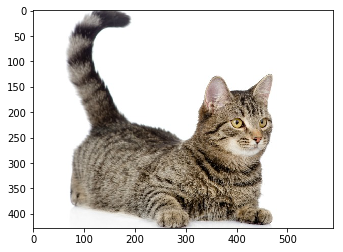

In [44]:
import matplotlib.pyplot as plt
plt.imshow(img)

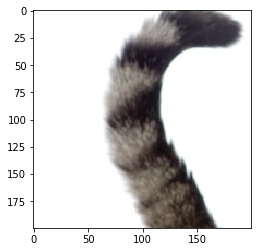

In [46]:
img_square = img[0:200, 0:200]
plt.imshow(img_square)



You can do many mathematical operations with `numpy` arrays. Before that, let's see how to access values which satisfy a condition we set.

In [47]:
a = np.array([[1,2],[3,4],[5,6]])
print(a > 2)
print(a[a > 2])

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]


As said before, we can easily do mathematical operations involving matrices.

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64) # notice that we force the data type to be float64
y = np.array([[5,6],[7,8]], dtype=np.float64)

print(x + y)
print(np.add(x, y))

print(x - y)
#np.subtract(x, y)

print(x * y) # elementwise!
#np.multiply(x, y)

print(x / y) # elementwise!
#np.divide(x, y)

print(np.sqrt(x))

In [48]:
x = np.array([[1,2],[3,4]])
print(x)
print(x.sum())

print(x.sum(axis=0))
print(x.sum(axis=1))

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


***DIY (3)*** What happens if we substract the cat image from the cat image? Can you switch colours (e.g. from black to white) for all pixel? What happens if we add them? Write such images.

In [ ]:
# ...

The last think to mention about `numpy` arrays is how we can manipulate them using broadcasting.

In [49]:
# multiply a matrix by a constant
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(x * 2) 

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]
 [20 22 24]]


In [50]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y = np.array([1,0,1])

print(x.shape)
print(y.shape)

z = x + y

print(z)

(4, 3)
(3,)
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


***DIY (4)*** Create a tinted image of the cat, by multiplying its colour channel by `[1, 0.95, 0.9]`. Instead of writing a new file, plot it on the screen. We use the package `matplotlib` and its function `imshow` which takes the `numpy` array in input. You need to force the data type to be unsigned integer 8 bits and you can achieve this with the function `np.uint8()`.

<IPython.core.display.Javascript object>


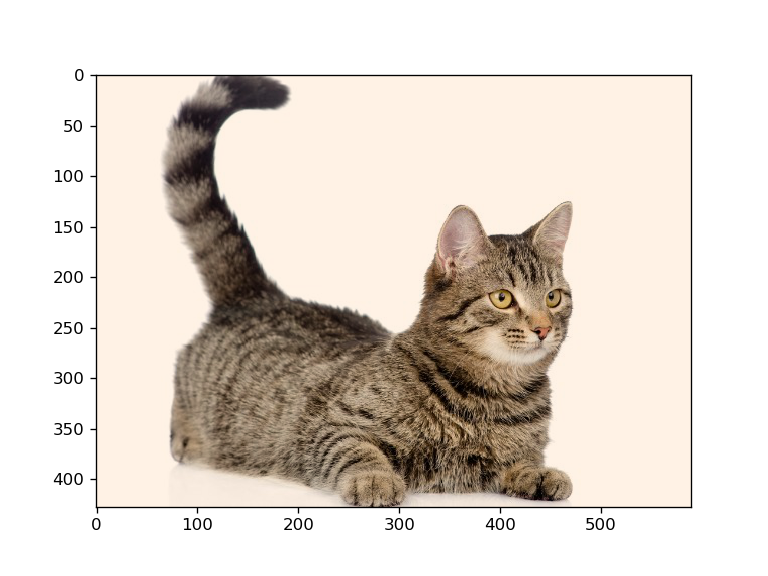

In [54]:
%matplotlib notebook
import matplotlib.pyplot as plt

a = [1, 0.95, 0.9]
tint_img = np.uint8(img*a)


# ...
plt.imshow(tint_img)

## Training and testing data

The first think we do is to load images representing genomic data from various species. These images have already been converted into `numpy` arrays. (Note that we have already preprocessed our data, so pixel intensitities have been scaled between 0 and 1.)

In [55]:
X_train = np.load("Data/X_train.npy")
print(X_train.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/X_train.npy'

If we want to plot one image, then we need to do a proper slicing.

In [ ]:
print(X_train[0,:,:,0].shape)

plt.imshow(X_train[0,:,:,0], cmap=plt.cm.binary)

which corresponds to the following matrix:

In [ ]:
X_train[0,:,:,0]

Apart from the data itself (called `X`), we also need labels (called `y`) associated to each data point. These labels indicate which class each data point belongs to. What is the rank and shape of this `numpy` array?

In [ ]:
y_train = np.load("Data/y_train.npy")
print(y_train.shape)
y_train

If you recall, we collected 400 samples per class so we should expect 1600 data points. We have 1200 entries in the training set. Why?

We split the data we have into training and testing. The learning will be done in the training set and the measurement of accuracy will happen on the testing set. What is the rank and shape of the these `numpy` objects?

In [ ]:
X_test = np.load("Data/X_test.npy")
print(X_test.shape)

y_test = np.load("Data/y_test.npy")
print(y_test.shape)

Finally, we want to predict the classification of an unknown species, the Marsican bear (labelled as `ursus`).
Let's load its image, check its rank and plot it.

In [ ]:
X_ursus = np.load("Data/X_ursus.npy")
print(X_ursus.shape)

plt.imshow(X_ursus[0,:,:,0], cmap=plt.cm.binary)

## Nearest Neighbour Classifier


Now we wan to implement a NN classifier to assign a label to our image of the Marsican bear.
The idea is to select the image(s) which is (are) closer to the one of interest.
For instance, the simple elementwise difference between images can be calculated as:

In [ ]:
X_ursus[0,:,:,0] - X_train[0,:,:,0]

***DIY (5)*** Implement a NN classifier using the L1 distance and predict the label for the Ursus image. A possible framework is given below but feel free to use your own creativity. (A possible solution is in the Solutions folder, learning.py file.)

In [ ]:
labels = ["LC", "VU", "EN", "CR"] # these are the 4 possible classes
min_distance = 9999 # initialise a value for the distance
for i in range(0, X_train.shape[0]):
    distance = ...
    if ...
        ...
        ...

Now you can easily implement a NN classifer applied to the whole testing set. What's the achieved accuracy? You can do it yourself, but the idea is that you have to execute the above operation for each sample from the testing set.

## TensorFlow

We will be using TensorFlow to build and train our deep neural network. In particular, we will use Keras which is TensorFlow's high-level API.
Keras is used for fast prototyping and production since it is
* User friendly: a simple, consistent interface optimized for common use cases.
* Modular and composable: models are made by connecting building blocks together.
* Easy to extend: you can write custom building blocks, new layers, loss functions, etc. etc.

`tf.keras` is the implementation of [Keras API specification](https://keras.io/). `tf.keras` can run any Keras-compatible code.

In [57]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

### Sequential model

Let's build a simple model. In Keras, you assemble layers to build models. A model is a graph of layers. The most common type of model is a stack of layers: the `tf.keras.Sequential` model.
For instance, we can build a simple, fully-connected network with the following code.

In [56]:
model = tf.keras.Sequential()
# Adds a densely-connected layer with 16 units to the model:
model.add(tf.keras.layers.Dense(16, activation='relu'))
# Add another:
model.add(tf.keras.layers.Dense(16, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(5, activation='softmax'))

NameError: name 'tf' is not defined

### Configure the layers

There are several `tf.keras.layers` available with some common constructor parameters:
* activation: set the activation function for the layer, specified by the name of a built-in function or as a callable object.
* kernel_initializer and bias_initializer: the initialization schemes that create the layer's weights (kernel and bias).
* kernel_regularizer and bias_regularizer: the regularization schemes that apply the layer's weights (kernel and bias).
The following examples show how to create instances of `tf.keras.layers.Dense` layers using constructor arguments.

In [ ]:
# Create a sigmoid layer:
tf.keras.layers.Dense(16, activation='sigmoid')
# Or:
tf.keras.layers.Dense(16, activation=tf.sigmoid)

# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
tf.keras.layers.Dense(16, bias_regularizer=tf.keras.regularizers.l2(0.01))

# A linear layer with a kernel initialized to a random orthogonal matrix:
tf.keras.layers.Dense(16, kernel_initializer='orthogonal')

# A linear layer with a bias vector initialized to 2.0s:
tf.keras.layers.Dense(16, bias_initializer=tf.keras.initializers.constant(2.0))

### Training

After the model is constructed, we can configure its learning process by calling the `compile` method.

In [ ]:
model = tf.keras.Sequential([
                            # Adds a densely-connected layer with 16 units to the model: 
                            tf.keras.layers.Dense(16, activation='relu'),
                            # Add another:
                            tf.keras.layers.Dense(16, activation='relu'),
                            # Add a softmax layer with 5 output units:
                            tf.keras.layers.Dense(5, activation='softmax')])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

`tf.keras.Model.compile` takes three main arguments:
* optimizer: it specifies the training procedure, such as `tf.train.AdamOptimizer`, `tf.train.RMSPropOptimizer`, or `tf.train.GradientDescentOptimizer`.
* loss: function to minimize during optimization, such as mean square error (mse), categorical_crossentropy, and binary_crossentropy, specified by name or by passing a callable object from the `tf.keras.losses` module.
* metrics: to monitor training; string names or callables from the `tf.keras.metrics` module.

Let's make a quick example using `numpy` to train and evaluate our model using the `fit` method.

In [ ]:
data = np.random.random((1000, 32))
labels = np.random.random((1000, 5))

model.fit(data, labels, epochs=10, batch_size=32)

`tf.keras.Model.fit` takes three main arguments:
* epochs: training is structured into epochs, iterations over the entire input data.
* batch_size: the model slices the data into smaller batches and iterates over these batches during training.
* validation_data: tuple of inputs and labels for validation.

When prototyping a model, you want to easily monitor its performance on some validation data. Passing the validation_data argument allows the model to display the loss and metrics in inference mode for the passed data, at the end of each epoch. Here's an example using validation_data.

In [ ]:
data = np.random.random((1000, 32))
labels = np.random.random((1000, 5))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 5))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))

For large datasets or multi-device training you can use the [Datasets API](https://www.tensorflow.org/guide/datasets).

### Evaluate and predict

The `tf.keras.Model.evaluate` and `tf.keras.Model.predict` methods can use NumPy data and a `tf.data.Dataset` to evaluate the inference-mode loss and metrics.

In [ ]:
data = np.random.random((1000, 32))
labels = np.random.random((1000, 5))

model.evaluate(data, labels, batch_size=32)

We can predict the output for the data provided.

In [ ]:
result = model.predict(data, batch_size=32)
print(result.shape)

You can read the full [documentation](https://www.tensorflow.org/guide/keras) for building custom models and more advanced models. 
You may also want to check out [TensorBoard](https://www.tensorflow.org/guide/summaries_and_tensorboard) and [Low Level](https://www.tensorflow.org/guide/low_level_intro) information which is helpful for debugging.
A series of [tutorials](https://www.tensorflow.org/tutorials/) is also available.

## DNN for predicting conservation status

Let's build our CNN. First thing, we need to define the architecture.
To do that, we need to import some modules from `keras`.
Instead of using `tensorflow`, we can use the high-levekl API `keras` with a tensforlow backend.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

X_train = np.load("Data/X_train.npy")
y_train = np.load("Data/y_train.npy")

X_test = np.load("Data/X_test.npy")
y_test = np.load("Data/y_test.npy")

X_ursus = np.load("Data/X_ursus.npy")

### Architecture

Building the neural network requires configuring the layers of the model, then compiling the model.
The sequential model type from `keras` is simply a linear stack of neural network layers.
Each layer will be added (or stacked) to the initial model.

In [ ]:
model = keras.Sequential()

The model needs also to know what input shape it should expect. The first layer (but only the first) needs to receive such information.
Let's add a convolutional layer. We can read how to do it from [here](https://keras.io/layers/convolutional/#conv2d).
Also note that we can add activation and padding layers directly into this convolutional layer.

In [ ]:
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same", input_shape=(64, 64, 1)))

After a convolutional layer it is often used a max-pooling layer. Read its definition [here](https://keras.io/layers/pooling/#maxpooling2d).

In [ ]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

To prevent overfitting, one trick is to use a [Dropout](https://keras.io/layers/core/#dropout) layer.

In [ ]:
model.add(keras.layers.Dropout(rate=0.5))

You can add several cycles of Conv-MaxPool-Dropout.
If you then want to move towards the final fully connected neural network, you need to first flatten the network.

In [ ]:
model.add(keras.layers.Flatten())

Finally we can add a fully connected network with a relu activation using a [Dense](https://keras.io/layers/core/#dense) layer, another dropout layer, and then the output layer with a softmax activation.

In [ ]:
model.add(keras.layers.Dense(units=32, activation="relu"))
# we need 4 units at the output since we have 4 classes
model.add(keras.layers.Dense(units=4, activation="softmax"))

We can even print a summary of our architecture with the specification of the learnable parameters.

In [ ]:
model.summary()

### Compiling

We need to "compile" the network and prepare it for the training. We do it by specifying the [loss function](https://keras.io/losses/) and [optimisation](https://keras.io/optimizers/) to use.

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training

Let's train our network. We pass the training data set and the network will optimise its parameters to minimise the loss function.
We can allocate a portion of the training data as validation data. You can read more [here](https://keras.io/models/sequential/).

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.20)

The validation accuracy is used to tune the hyper-parameters (e.g. learning rate, dropout rate).
It's convenient to plot the decay of loss and increase of accuracy for both the training and validation set.

In [ ]:
from matplotlib import rcParams

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

xc = range(10)
x_axis = np.zeros(len(xc))
for x,i in enumerate (xc):
    x_axis[i] = x + 1

rcParams['axes.titlepad'] = 20 
plt.figure(1,figsize=(7,5),facecolor='white')
plt.plot(x_axis,train_loss)
plt.plot(x_axis,val_loss)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training loss and validation loss',fontsize=12)
plt.grid(True)
plt.legend(['Training loss','Validation loss'],fontsize=12)
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5),facecolor='white')
plt.plot(x_axis,train_acc)
plt.plot(x_axis,val_acc)
plt.xlabel('Epoch',fontsize=12)
plt.ylabel('Accuracy',fontsize=12) 
plt.title('Training accuracy and validation accuracy',fontsize=12)
plt.grid(True)
plt.legend(['Training accuracy','Validation accuracy'],fontsize=12,loc=4)
plt.style.use(['classic'])

### Evaluation

Now we need to test our network. In other words we evaluate it using the testing data set.

In [ ]:
score = model.evaluate(X_test, y_test)
print(score) # will return the test loss and test accuracy

We can even plot a confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
# if you don't have sklearn install it with: conda install scikit-learn

Y_pred = model.predict(X_test, batch_size=None, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

classes = ["LC", "VU", "EN", "CR"] # these are the 4 possible classes

cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
np.set_printoptions(precision=2)
fig = plt.figure(facecolor='white')
title = 'Normalized confusion matrix'
cmap = plt.cm.Blues
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
#plt.colorbar(shrink=0.7) # alternative
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90, fontsize=8)
#plt.xticks(tick_marks, rotation=45, fontsize=6) # alternative
plt.yticks(tick_marks, classes, fontsize=8)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Prediction

Finally we used the final optimised network to predict the label for unknown entries.
More info [here](https://keras.io/models/sequential/).


In [ ]:
y_ursus = model.predict(X_ursus)
print(y_ursus)

The nice thing is that these are proper posterior probabilities. Therefore we can even calculate Bayes factors and do model testing. Imagine that we want to test whether this species is not threatened (so not "least concern"). We can calculate this Baye factor as follows:

In [ ]:
(1 - y_ursus[0,0])/(3/4) / (y_ursus[0,0])/(1/4)

## BYON (Build Your Own Network)

Can you do better than this network? Can you build a network which leads to a higher testing accuracy than this one?
Try to build your own architecture and compiler.
Some tips:
- you can use multiple cycles of Conv+MaxPool+Dropout layers
- you can play with the dropout rates to prevent overfitting
- you can tune the learning rate
- you can add more/less units (or neurons) in the dense layers
- you can add more/less filters or change their size (but be careful with it!)
- try a leakyReLu or other activation functions
- change how you initialise the weights
- ...

Be aware that the accuracy won't improve by default if you make the network deeper: you have more parameters to optimise with the same data set!

Ideally, you may want to try different configurations and retain the one with the highest validation accuracy. Then this network will be passed to the testing set. For instance, assume that you have one hyper-parameter and you want to estimate it. How would you build such pipeline?

The best way of learning is by doing. Read the keras manual https://keras.io/ to learn how to implement your ideas.
Pick a partner or more and start a team.

It's a competition.

Good luck!


In [ ]:
# ...